<a href="https://colab.research.google.com/github/jitendra986/100-Days-of-Deep-Learning/blob/main/early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [5]:
X,y = make_circles(n_samples=100, noise=0.1, random_state =1)

In [14]:
#sns.scatterplot(X[:,0],X[:,1], hue=y)

In [15]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [16]:
model=Sequential()

model.add(Dense(256,input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train, validation_data =(X_test, y_test), epochs=3500, verbose=0)
#verbose =0 will make sure that output is not going to print

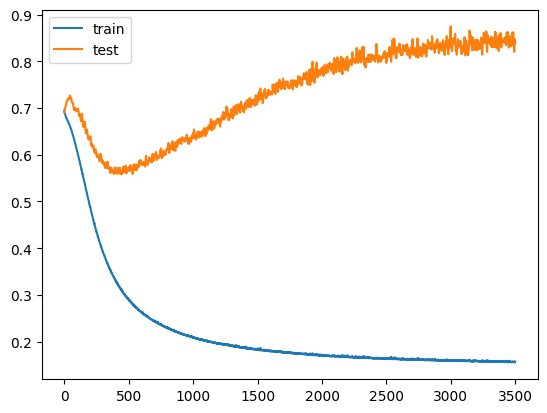

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 12s 1ms/step


TypeError: ignored

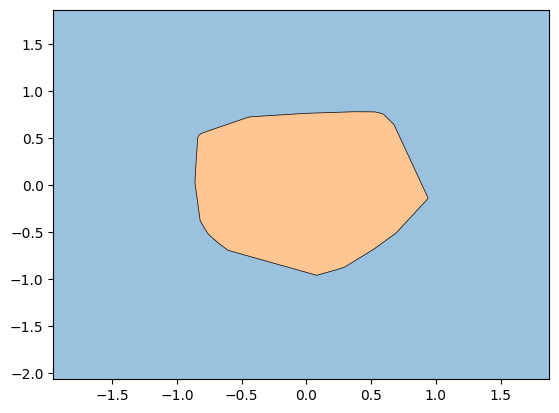

In [20]:
plot_decision_regions(X_test,y_test.ravel(), clf=model, legend=2)
plt.show()

Early Stopping

In [27]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="max",
    baseline=None,
    restore_best_weights=True
)

In [50]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)
#verbose =0 will make sure that output is not going to print

Epoch 1/3500
3/3 [==============================] - 0s 66ms/step - loss: 0.2096 - accuracy: 0.9125 - val_loss: 0.6795 - val_accuracy: 0.6500
Epoch 2/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.2097 - accuracy: 0.9125 - val_loss: 0.6820 - val_accuracy: 0.6500
Epoch 3/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.2097 - accuracy: 0.9125 - val_loss: 0.6807 - val_accuracy: 0.6500
Epoch 4/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.2101 - accuracy: 0.9125 - val_loss: 0.6801 - val_accuracy: 0.6500
Epoch 5/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.2096 - accuracy: 0.9125 - val_loss: 0.6807 - val_accuracy: 0.6500
Epoch 6/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.2101 - accuracy: 0.9125 - val_loss: 0.6824 - val_accuracy: 0.6500
Epoch 7/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.2096 - accuracy: 0.9125 - val_loss: 0.6815 - val_accuracy: 0.6500
Epoch 8/3500


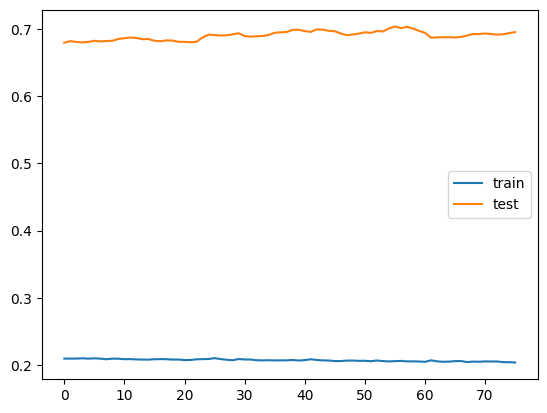

In [51]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 12s 1ms/step


TypeError: ignored

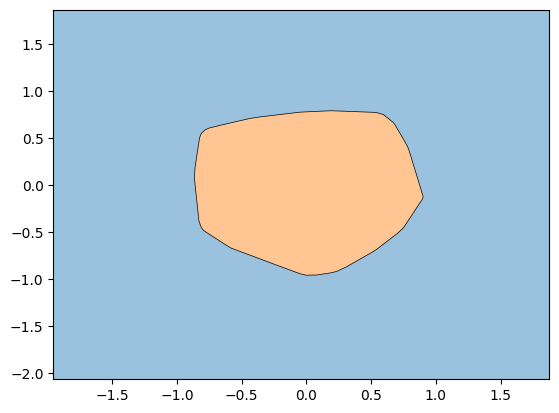

In [42]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()